In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt
/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt


# Data overview 

In [2]:
# Libraries 

import numpy as np
import pandas as pd

In [3]:
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/article.txt", "r") as f:
    articles = f.read().splitlines()
    
    
with open("/kaggle/input/bengali-news-summarization-dataset/Bengali-News-Summarization-Dataset/summary.txt", "r") as f:
    summaries = f.read().splitlines()

# Create a DataFrame
df = pd.DataFrame(list(zip(articles, summaries)), columns=["article", "summary"])

# Display the first few rows
df.head()

,article,summary
0,স্ট্যান্ডার্ড চার্টার্ড ব্যাংকের নতুন প্রধান ন...,স্ট্যান্ডার্ড চার্টার্ডের নতুন সিইও আবরার
1,রাজধানী থেকে চামড়া শিল্পগুলো সাভারে স্থানান্তর...,মার্চের মধ্যে সাভারে চামড়া শিল্পের সিইটিপি: মন...
2,দেশীয় শিল্প বিকাশে সরকারের সব ধরনের উদ্যোগ অব্...,ওয়ালটন কারখানায় শিল্পমন্ত্রী
3,একীভূত হতে চলেছে অনলাইনে শ্রেণিবদ্ধ বিজ্ঞাপন স...,একীভূত হচ্ছে এখানেই ডটকমওএলএক্স
4,যাত্রীবাহী একটি বাসে আগুন দেওয়ার আধা ঘণ্টার মধ...,বাসে আগুন: নড়াইলের পৌর মেয়র গ্রেপ্তার


# Expalanatory data analysis 

Total Articles: 19096, Total Summaries: 19096
article    0
summary    0
dtype: int64
                                                  article  \
count                                               19096   
unique                                              19063   
top     সপ্তাহের প্রথম দিন বাংলাদেশের দুই পুঁজিবাজারেই...   
freq                                                    2   

                        summary  
count                     19096  
unique                    19011  
top     সূচক বেড়েছে পুঁজিবাজারে  
freq                          8  
Number of duplicate rows: 21


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


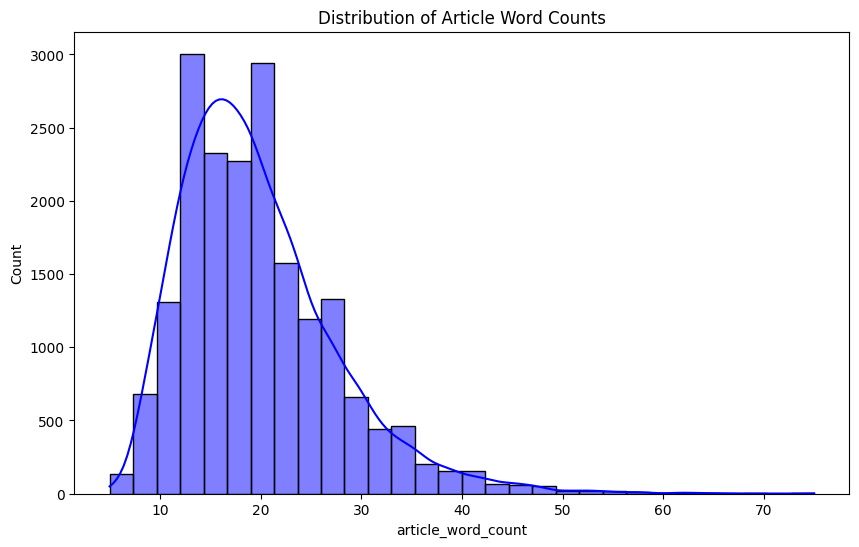

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


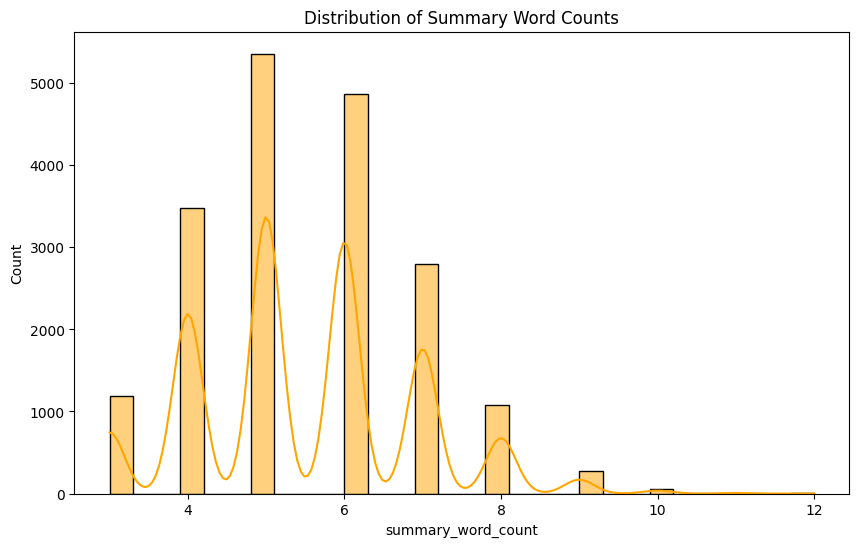

In [4]:
# Dataset Overview
print(f"Total Articles: {len(articles)}, Total Summaries: {len(summaries)}")
print(df.isnull().sum())  # Check for missing values
print(df.describe())  # Overview of the data

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Word count of articles and summaries
df['article_word_count'] = df['article'].apply(lambda x: len(x.split()))
df['summary_word_count'] = df['summary'].apply(lambda x: len(x.split()))

# Distribution plots for word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['article_word_count'], bins=30, kde=True, color='blue').set_title('Distribution of Article Word Counts')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['summary_word_count'], bins=30, kde=True, color='orange').set_title('Distribution of Summary Word Counts')
plt.show()


### Removing Duplicate Rows


In [5]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Verify if duplicates have been removed
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of duplicate rows: 21
Number of rows after removing duplicates: 19075


### Handling outliers

In [6]:
# Outlier detection based on word count
outliers = df_cleaned[(df_cleaned['article_word_count'] < 5) | (df_cleaned['summary_word_count'] < 5)]
print(f"Outliers: {len(outliers)}")


Outliers: 4653


### Text analysis

/tmp/ipykernel_30/2913932417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(x.split()))
/tmp/ipykernel_30/2913932417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['summary_word_count'] = df_cleaned['summary'].apply(lambda x: len(x.split()))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

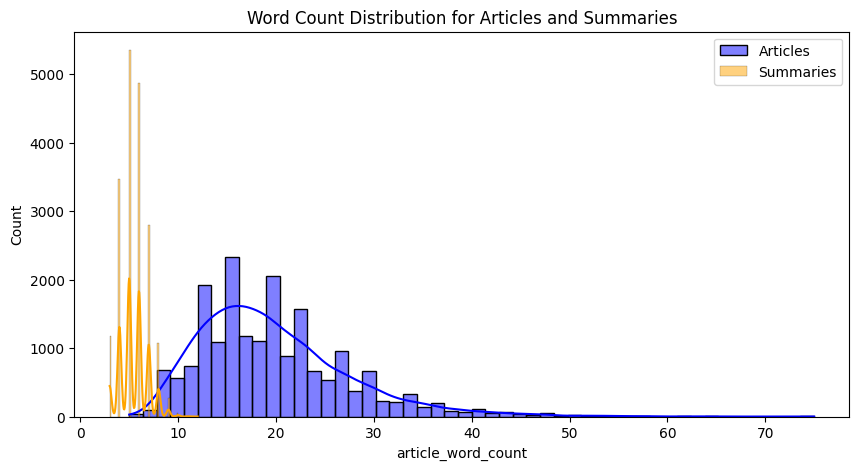

In [7]:
# Calculate word count for articles and summaries
df_cleaned['article_word_count'] = df_cleaned['article'].apply(lambda x: len(x.split()))
df_cleaned['summary_word_count'] = df_cleaned['summary'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['article_word_count'], bins=50, kde=True, color='blue', label='Articles')
sns.histplot(df_cleaned['summary_word_count'], bins=50, kde=True, color='orange', label='Summaries')
plt.legend()
plt.title('Word Count Distribution for Articles and Summaries')
plt.show()


/tmp/ipykernel_30/510231583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['article_length'] = df_cleaned['article'].apply(lambda x: len(x.split()))
/tmp/ipykernel_30/510231583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['summary_length'] = df_cleaned['summary'].apply(lambda x: len(x.split()))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN

Average article length: 19.6729750982962
Average summary length: 5.486657929226737


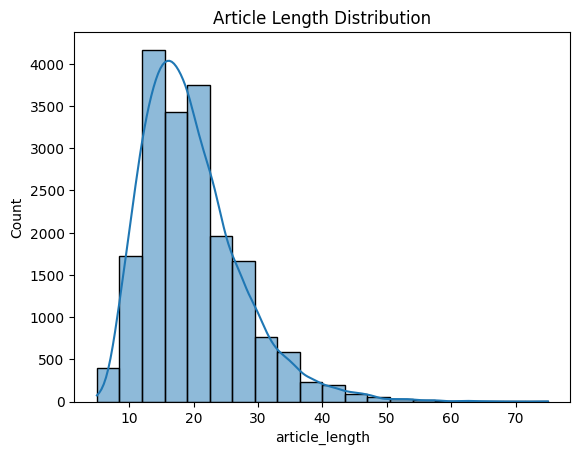

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


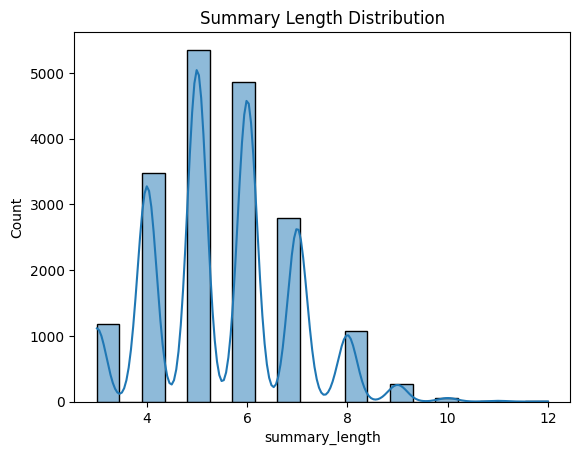

In [8]:
# Display basic statistics
df_cleaned.describe()

# Length of articles and summaries
df_cleaned['article_length'] = df_cleaned['article'].apply(lambda x: len(x.split()))
df_cleaned['summary_length'] = df_cleaned['summary'].apply(lambda x: len(x.split()))

# Print a summary of the lengths
print("Average article length:", df_cleaned['article_length'].mean())
print("Average summary length:", df_cleaned['summary_length'].mean())

# You can also visualize the length distribution using matplotlib or seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['article_length'], bins=20, kde=True)
plt.title("Article Length Distribution")
plt.show()

sns.histplot(df_cleaned['summary_length'], bins=20, kde=True)
plt.title("Summary Length Distribution")
plt.show()

In [9]:
# average length

avg_article_length = df_cleaned['article_word_count'].mean()
avg_summary_length = df_cleaned['summary_word_count'].mean()
print(f"Average Article Length: {avg_article_length} words")
print(f"Average Summary Length: {avg_summary_length} words")

Average Article Length: 19.6729750982962 words
Average Summary Length: 5.486657929226737 words


In [10]:
# Minimum and Maximum Length

min_article_length = df_cleaned['article_word_count'].min()
max_article_length = df_cleaned['article_word_count'].max()
min_summary_length = df_cleaned['summary_word_count'].min()
max_summary_length = df_cleaned['summary_word_count'].max()

print(f"Min/Max Article Length: {min_article_length} / {max_article_length} words")
print(f"Min/Max Summary Length: {min_summary_length} / {max_summary_length} words")

Min/Max Article Length: 5 / 75 words
Min/Max Summary Length: 3 / 12 words


In [11]:
# Comparison Between Articles and Summaries

df_cleaned['length_ratio'] = df_cleaned['article_word_count'] / df_cleaned['summary_word_count']
avg_length_ratio = df_cleaned['length_ratio'].mean()
print(f"Average Length Ratio (Article/Summary): {avg_length_ratio}")

Average Length Ratio (Article/Summary): 3.821676803609962


/tmp/ipykernel_30/3103890105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['length_ratio'] = df_cleaned['article_word_count'] / df_cleaned['summary_word_count']


In [12]:
# Outliers 

outliers = df_cleaned[(df_cleaned['article_word_count'] > max_article_length * 0.95) | (df_cleaned['article_word_count'] < min_article_length * 1.05)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 20


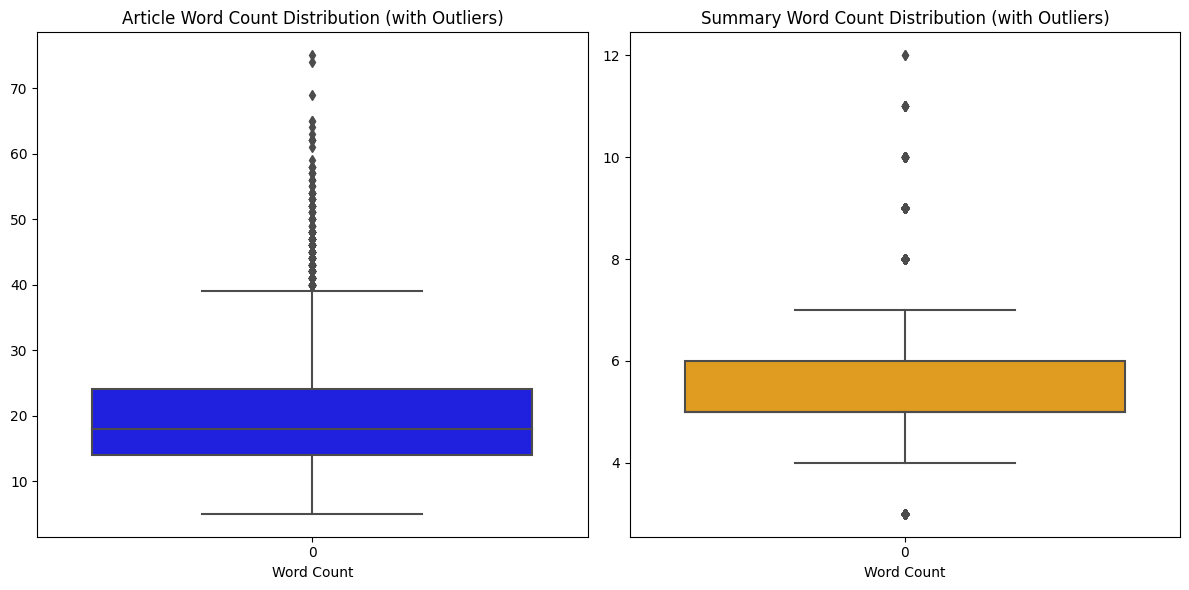

In [13]:
# Set up the plotting area
plt.figure(figsize=(12, 6))

# Plot boxplot for article word counts
plt.subplot(1, 2, 1)
sns.boxplot(df_cleaned['article_word_count'], color='blue')
plt.title('Article Word Count Distribution (with Outliers)')
plt.xlabel('Word Count')

# Plot boxplot for summary word counts
plt.subplot(1, 2, 2)
sns.boxplot(df_cleaned['summary_word_count'], color='orange')
plt.title('Summary Word Count Distribution (with Outliers)')
plt.xlabel('Word Count')

plt.tight_layout()
plt.show()

In [14]:
# Display the articles and summaries of the 20 outliers
outliers_articles_summaries = outliers[['article', 'summary']]
print(outliers_articles_summaries)

                                                 article  \
1016                          শেষ হল তাদের প্রথম ইভেন্ট।   
1798                         ওভেন ছাড়া কেক তৈরির পদ্ধতি।   
2277                       মৌসুমি সবজি দিয়ে মজার তরকারী।   
3050                       খবরটি প্রত্যাহার করা হল। বিস৤   
3149                        সত্যিই কি বাদামি চিনি উপকারী   
3831                     উশকোখুশকো চুল আছে ঘরোয়া সমাধান।   
4819                   তবে চিকিৎসায় মিলতে পারে প্রতিকার।   
5439                                পেট ও মন দুটোই ভরবে।   
6342                         সময় লাগবে মাত্র পাঁচ মিনিট।   
8065               নিয়মিত পরিচর্যা ত্বক থাকবে স্বাভাবিক।   
8838                         ঠিক তেলপানি দিয়ে রান্না নয়।   
9182                           কোথায় কেমন দাম, জেনে নিন।   
9502                          রান্না করে তাক লাগিয়ে দিন।   
9831                             এক ছাদের নিচে সব আয়োজন।   
9845                   সিদ্দিকা কবীর স্মরণে দুটি রেসিপি।   
10658                          তাহলে জেন

In [15]:
# Identify outliers based on word count thresholds
max_article_length = df_cleaned['article_word_count'].max()
min_article_length = df_cleaned['article_word_count'].min()

outliers = df_cleaned[(df_cleaned['article_word_count'] > max_article_length * 0.95) |
                      (df_cleaned['article_word_count'] < min_article_length * 1.05)]

# Remove the outliers from the dataset
df_cleaned = df_cleaned.drop(index=outliers.index)

# Confirm the number of rows after removing outliers
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")


Number of rows after removing outliers: 19055


In [16]:
# Rename df_cleaned to df_final after removing outliers
df_final = df_cleaned.copy()

# Check the shape of the final dataset after removing outliers
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (19055, 7)


<class 'pandas.core.frame.DataFrame'>
Index: 19055 entries, 0 to 19095
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   article             19055 non-null  object 
 1   summary             19055 non-null  object 
 2   article_word_count  19055 non-null  int64  
 3   summary_word_count  19055 non-null  int64  
 4   article_length      19055 non-null  int64  
 5   summary_length      19055 non-null  int64  
 6   length_ratio        19055 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ MB
Average article length: 19.681081081081082
Average summary length: 5.488113356074521


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


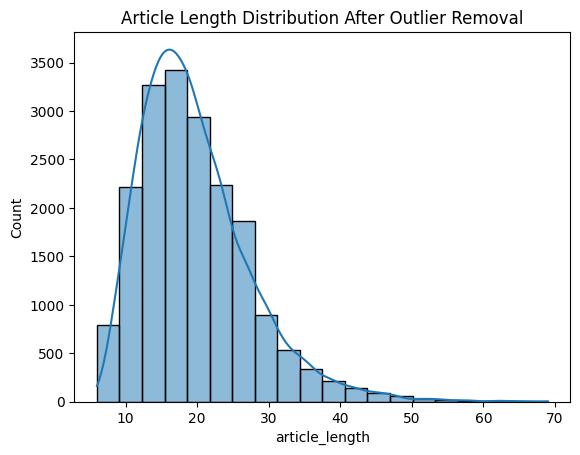

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


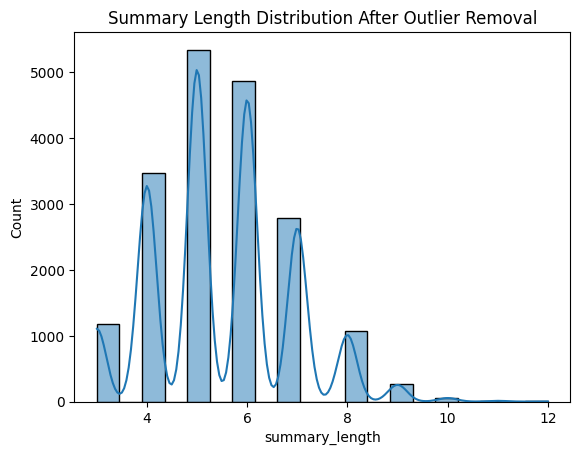

Final dataset shape: (19055, 7)


In [17]:
# Check for missing values and basic information
df_final.info()

# Add new columns for article and summary lengths
df_final['article_length'] = df_final['article'].apply(lambda x: len(x.split()))
df_final['summary_length'] = df_final['summary'].apply(lambda x: len(x.split()))

# Check basic statistics
print(f"Average article length: {df_final['article_length'].mean()}")
print(f"Average summary length: {df_final['summary_length'].mean()}")

# Visualize the distribution of article and summary lengths
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_final['article_length'], bins=20, kde=True)
plt.title("Article Length Distribution After Outlier Removal")
plt.show()

sns.histplot(df_final['summary_length'], bins=20, kde=True)
plt.title("Summary Length Distribution After Outlier Removal")
plt.show()
print(f"Final dataset shape: {df_final.shape}")

# Preprocessing the Data

In [18]:
import pandas as pd
import re
from transformers import MBart50Tokenizer
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset

# 1. Clean the text: remove special characters, numbers, etc.
def clean_text(text):
    # Remove anything that's not Bengali characters or whitespace
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)  
    return text

df_final['article_cleaned'] = df_final['article'].apply(clean_text)
df_final['summary_cleaned'] = df_final['summary'].apply(clean_text)

# 2. Tokenization using Hugging Face mBART Tokenizer for Bengali
model_name = "facebook/mbart-large-50"
tokenizer = MBart50Tokenizer.from_pretrained(model_name, src_lang="bn_IN", tgt_lang="bn_IN")

# Function to tokenize the dataset
def tokenize_data(article, summary):
    # Tokenize and return input_ids and labels for each article-summary pair
    inputs = tokenizer(article, max_length=1024, truncation=True, return_tensors="pt")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(summary, max_length=128, truncation=True, return_tensors="pt")
    return inputs.input_ids, labels.input_ids

# 3. Tokenizing the entire dataset
input_ids = []
label_ids = []

for idx, row in df_final.iterrows():
    article_ids, summary_ids = tokenize_data(row['article_cleaned'], row['summary_cleaned'])
    input_ids.append(article_ids)
    label_ids.append(summary_ids)

# 4. Convert input_ids and label_ids into appropriate tensor formats
input_ids = [i.squeeze() for i in input_ids]  # Remove extra dimension from tokenized inputs
label_ids = [l.squeeze() for l in label_ids]  # Remove extra dimension from tokenized labels

# 5. Pad the sequences to ensure uniform length
input_ids_padded = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
label_ids_padded = pad_sequence(label_ids, batch_first=True, padding_value=-100)  # Use -100 for padding in labels (ignored during loss calculation)


tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


### Preparing the Dataset for Training

In [19]:
# Create Dataset for PyTorch DataLoader
class SummarizationDataset(Dataset):
    def __init__(self, input_ids, label_ids):
        self.input_ids = input_ids
        self.label_ids = label_ids
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'labels': self.label_ids[idx]
        }

# 6. Create the dataset
dataset = SummarizationDataset(input_ids_padded, label_ids_padded)

# 7. Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# 8. Create DataLoader for batch processing
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")


Training dataset size: 15244
Validation dataset size: 3811


# Fine-tuning mBART for Summarization


### 1. Loading the Pre-trained mBART Model


In [20]:
from transformers import MBartForConditionalGeneration, Trainer, TrainingArguments

# Load the pre-trained mBART model and tokenizer
model_name = "facebook/mbart-large-50"
model = MBartForConditionalGeneration.from_pretrained(model_name)

# Set the tokenizer languages for source and target (Bengali)
tokenizer.src_lang = "bn_IN"
tokenizer.tgt_lang = "bn_IN"


pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

### 2. Setting Up Training Arguments


In [28]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, EarlyStoppingCallback

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=4,
    num_train_epochs=8,
    weight_decay=0.01,
    save_total_limit=2,
    predict_with_generate=True,
    logging_dir='./logs',
    logging_steps=500,
    load_best_model_at_end=True,
    gradient_accumulation_steps=8,  # Effective batch size of 32
    fp16=True,  # Enable mixed precision
    lr_scheduler_type="linear",  # Learning rate scheduler
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### 3. Defining the Trainer


In [29]:

# Define data collator for seq2seq tasks
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Define the Seq2SeqTrainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],  # Early stopping after 3 epochs with no improvement
    optimizers=(None, None),  # Don't save optimizer and scheduler states
)


/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


### 4. Fine-tuning the Model


In [30]:

# Start training
trainer.train()


ResourceExhaustedError: logs/events.out.tfevents.1728053834.a6d8006a5f6d.30.2; No space left on device

# Evaluate the results

In [ ]:
# Evaluate the model on validation data
results = trainer.evaluate()

# Print evaluation results (e.g., loss, perplexity)
print(f"Evaluation Results: {results}")
